In [1]:
import sys
sys.path.append("..")
import models
import action_value_methods
import utils
import gymnasium as gym
import torch
import random

# Settings

In [2]:
ENVIRONMENT_ID = "CartPole-v1"
NUM_EPISODES = 10000
GRAD_CLIP_VALUE = 100
GAMMA = 0.9
EPS_START = 1
EPS_END = 0.01
NN_HIDDEN_LAYER_SIZES = [8, 4]
RNG_SEED = 7
MEMORY_SIZE = NUM_EPISODES * 500
BATCH_SIZE = 128
NUM_STEPS_BETWEEN_TARGET_MODEL_UPDATES = 1000
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
print("PyTorch device:", device)
torch.manual_seed(RNG_SEED)
random.seed(RNG_SEED)

PyTorch device: cpu


# Q-learning

## Linear model

Average return per episode: 22.3479


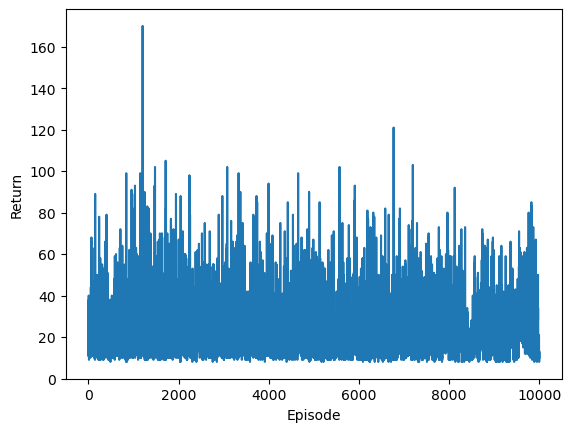

In [3]:
env = gym.make(ENVIRONMENT_ID)
env.action_space.seed(RNG_SEED)
model = torch.nn.Linear(env.observation_space.shape[0], env.action_space.n).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()
returns = action_value_methods.train_episodic_semi_grad_qlearning(
    env, model, loss_func, optimizer, device, RNG_SEED, NUM_EPISODES, GAMMA, EPS_START, EPS_END, GRAD_CLIP_VALUE
)
env.close()
utils.plot_returns(returns)

## Neural network model

Average return per episode: 67.9735


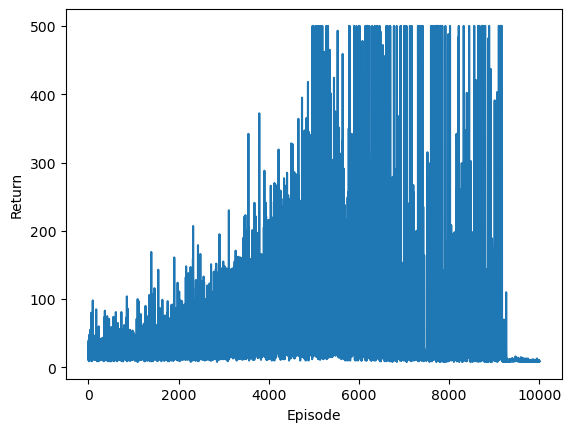

In [4]:
env = gym.make(ENVIRONMENT_ID)
env.action_space.seed(RNG_SEED)
model = models.create_simple_nn(env.observation_space.shape[0], env.action_space.n, NN_HIDDEN_LAYER_SIZES).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, amsgrad=True)
loss_func = torch.nn.MSELoss()
returns = action_value_methods.train_episodic_semi_grad_qlearning(
    env, model, loss_func, optimizer, device, RNG_SEED, NUM_EPISODES, GAMMA, EPS_START, EPS_END, GRAD_CLIP_VALUE
)
env.close()
utils.plot_returns(returns)

# Q-learning with experience replay

## Linear model

Average return per episode: 23.1085


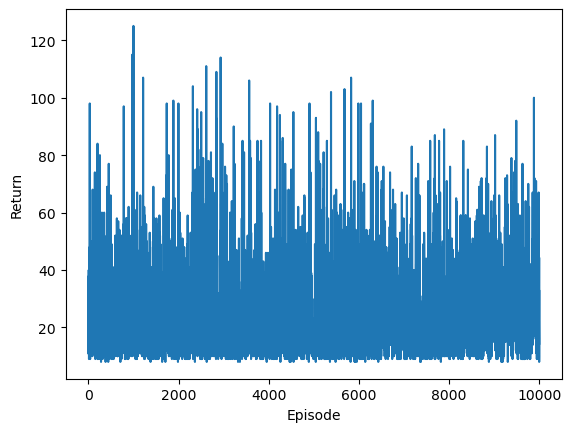

In [3]:
env = gym.make(ENVIRONMENT_ID)
env.action_space.seed(RNG_SEED)
model = torch.nn.Linear(env.observation_space.shape[0], env.action_space.n).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()
returns = action_value_methods.train_episodic_semi_grad_qlearning_exp_replay(
    env, model, model, loss_func, optimizer, device, RNG_SEED, NUM_EPISODES, GAMMA, EPS_START, EPS_END,
    MEMORY_SIZE, BATCH_SIZE, NUM_STEPS_BETWEEN_TARGET_MODEL_UPDATES, GRAD_CLIP_VALUE
)
env.close()
utils.plot_returns(returns)

## Neural network model

Average return per episode: 203.3329


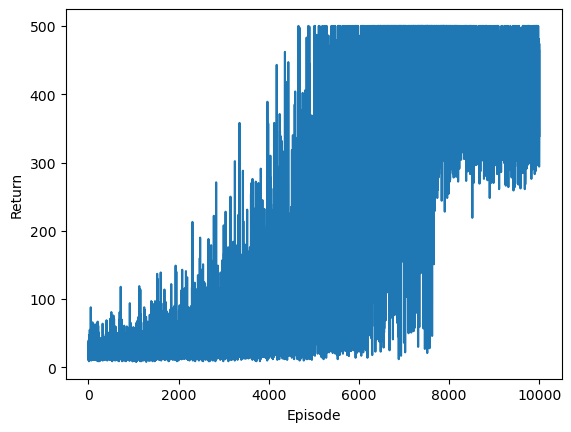

In [3]:
env = gym.make(ENVIRONMENT_ID)
env.action_space.seed(RNG_SEED)
model = models.create_simple_nn(env.observation_space.shape[0], env.action_space.n, NN_HIDDEN_LAYER_SIZES).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, amsgrad=True)
loss_func = torch.nn.MSELoss()
returns = action_value_methods.train_episodic_semi_grad_qlearning_exp_replay(
    env, model, model, loss_func, optimizer, device, RNG_SEED, NUM_EPISODES, GAMMA, EPS_START, EPS_END,
    MEMORY_SIZE, BATCH_SIZE, NUM_STEPS_BETWEEN_TARGET_MODEL_UPDATES, GRAD_CLIP_VALUE
)
env.close()
utils.plot_returns(returns)

## Two duplicate neural network models (policy network + target network)

The weights of the target network are updated to duplicate the weights of the policy network every C time steps, and kept frozen in between. This is done to stabilize learning. For more info, see the original DQN paper (Mnih, V., Kavukcuoglu, K., Silver, D. et al. Human-level control through deep reinforcement learning. Nature 518, 529–533 (2015). https://doi.org/10.1038/nature14236), or section 16.5 in the second edition of Reinforcement Learning: An Introduction (second edition, Sutton and Barto).

Average return per episode: 182.3907


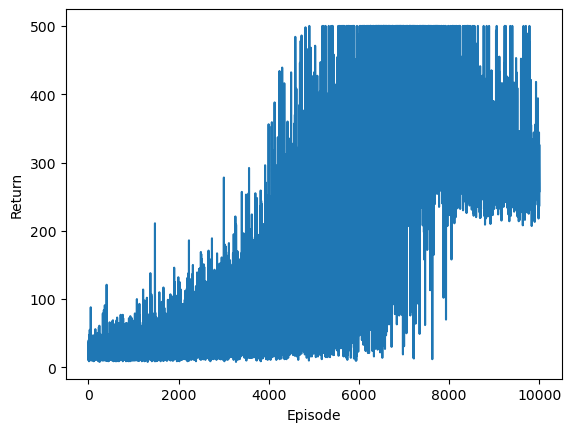

In [3]:
env = gym.make(ENVIRONMENT_ID)
env.action_space.seed(RNG_SEED)
policy_net = models.create_simple_nn(env.observation_space.shape[0], env.action_space.n, NN_HIDDEN_LAYER_SIZES).to(device)
target_net = models.create_simple_nn(env.observation_space.shape[0], env.action_space.n, NN_HIDDEN_LAYER_SIZES).to(device)
optimizer = torch.optim.AdamW(policy_net.parameters(), lr=0.001, amsgrad=True)
loss_func = torch.nn.MSELoss()
returns = action_value_methods.train_episodic_semi_grad_qlearning_exp_replay(
    env, policy_net, target_net, loss_func, optimizer, device, RNG_SEED, NUM_EPISODES, GAMMA,
    EPS_START, EPS_END, MEMORY_SIZE, BATCH_SIZE, NUM_STEPS_BETWEEN_TARGET_MODEL_UPDATES, GRAD_CLIP_VALUE
)
env.close()
utils.plot_returns(returns)

In [4]:
env = gym.make(ENVIRONMENT_ID)
env.action_space.seed(RNG_SEED)
policy_net = models.create_simple_nn(env.observation_space.shape[0], env.action_space.n, [8, 4]).to(device)
target_net = models.create_simple_nn(env.observation_space.shape[0], env.action_space.n, [8, 4]).to(device)
optimizer = torch.optim.AdamW(policy_net.parameters(), lr=0.0001, amsgrad=True)
loss_func = torch.nn.MSELoss()
returns = action_value_methods.train_episodic_semi_grad_qlearning_exp_replay(
    env, policy_net, target_net, loss_func, optimizer, device, RNG_SEED, 100000, GAMMA,
    EPS_START, EPS_END, MEMORY_SIZE, 512, NUM_STEPS_BETWEEN_TARGET_MODEL_UPDATES, GRAD_CLIP_VALUE
)
env.close()
utils.plot_returns(returns)